<center> <h1>Αναγνώριση Προτύπων - Προπαρασκευή 2ης Εργαστηριακής Άσκησης</h1> </center>

---

<center> <h2>Θέμα: Αναγνώριση φωνής με Κρυφά Μαρκοβιανά Μοντέλα και Αναδρομικά Νευρωνικά Δίκτυα</h2> </center>
<center> <h2>ΣΧΟΛΗ: ΣΗΜΜΥ</h2> </center>
<img src="pyrforos-digamma.png" width="100">

Ονοματεπώνυμο | Αριθμός Μητρώου
------------ | -------------
Γιάννης Πιτόσκας | 03115077
Αντώνης Παπαοικονόμου | 03115140

## Βήμα 1
Χρησιμοποιώντας το πρόγραμμα `Praat` για την ανάλυση των αρχείων ήχου έχουμε:

In [1]:
import subprocess
import os

data_path = os.path.dirname("./pr_lab2_2019-20_data/")

def usePraat(file, text):
    try:
        subprocess.call(["/Applications/Praat.app/Contents/MacOS/Praat", "--open", file])
    except OSError as e:
        if e.errno == errno.ENOENT:
            # handle file not found error
            print("Please download Praat and use the installation path when calling it")
        else:
            # Something else went wrong while trying to run
            print("An error occured")
            raise
            
# usePraat(data_path + "/onetwothree1.wav", "one two three")
# usePraat(data_path + "/onetwothree8.wav", "one two three")

<img src="pitch_mean_onetwothree1.png">
<img src="pitch_mean_onetwothree8.png">
<img src="formants_onetwothree1.png">
<img src="formants_onetwothree8.png">

999.7624910757692 Hz (mean F1 in SELECTION)<br>
2568.2020920385485 Hz (mean F2 in SELECTION)<br>
3763.962970328683 Hz (mean F3 in SELECTION)<br>
<br>
1522.7387179790562 Hz (mean F1 in SELECTION)<br>
2958.5714711553173 Hz (mean F2 in SELECTION)<br>
3924.813236998355 Hz (mean F3 in SELECTION)<br>
<br>
1564.9136738911895 Hz (mean F1 in SELECTION)<br>
3106.0191007879434 Hz (mean F2 in SELECTION)<br>
3908.220816228914 Hz (mean F3 in SELECTION)<br>
<br>
<br>
579.574899251275 Hz (mean F1 in SELECTION)<br>
1806.3230037579995 Hz (mean F2 in SELECTION)<br>
2847.797227900949 Hz (mean F3 in SELECTION)<br>
<br>
530.4466184919183 Hz (mean F1 in SELECTION)<br>
1786.186919057703 Hz (mean F2 in SELECTION)<br>
2801.8758790729344 Hz (mean F3 in SELECTION)<br>
<br>
494.06899004212613 Hz (mean F1 in SELECTION)<br>
2096.0501422577026 Hz (mean F2 in SELECTION)<br>
2775.4912341476625 Hz (mean F3 in SELECTION)<br>

## Βήμα 2
Εκτός από τις 3 λίστες της εκφώνησης (αρχεία ήχου, ομιλιτές και τα ψηφία) θα χρειαστούμε και το sample rate

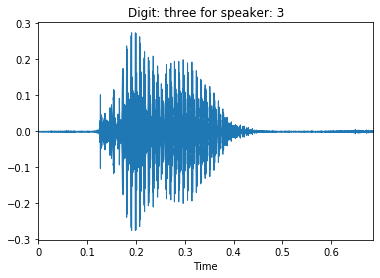

In [15]:
import os
import re
import librosa
import IPython.display

digits_dir = data_path + "/digits/"

def dataLoader(path):
    wavs = []
    speakers = []
    digits = []

    for filename in os.listdir(path):
        if filename.endswith(".wav"):
            
            wav, sr = librosa.load(os.path.join(path, filename))
            wavs.append(wav)
            
            # split characters from numbers
            file = re.split('(\d+)',filename)
            speakers.append(int(file[1]))
            digits.append(file[0])
    
    return wavs, speakers, digits, sr

wavs, speakers, digits, sr = dataLoader(digits_dir)

# Print example
librosa.display.waveplot(wavs[0], sr=sr)
plt.title("Digit: "+str(digits[0])+" for speaker: "+str(speakers[0]))
IPython.display.Audio(wavs[0], rate=sr)

## Βήμα 3
Για τα `Mel-Frequency Cepstral Coefficients` έχουμε:

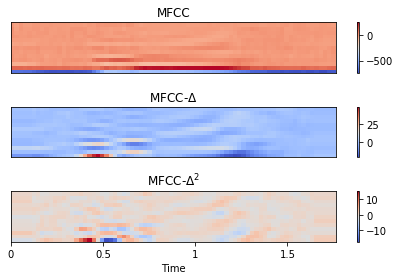

In [85]:
import matplotlib.pyplot as plt
import librosa.display

mfccs = []
mfcc_deltas = []
mfcc_delta_deltas = []

for wav in wavs:
    mfcc = librosa.feature.mfcc(y=wav, n_mfcc=13, hop_length=int(0.010*sr), n_fft=int(0.025*sr))
    mfcc_delta = librosa.feature.delta(mfcc, order=1)
    mfcc_delta_delta = librosa.feature.delta(mfcc, order=2)
    mfccs.append(mfcc)
    mfcc_deltas.append(mfcc_delta)
    mfcc_delta_deltas.append(mfcc_delta_delta)
    
plt.subplot(3, 1, 1)
librosa.display.specshow(mfcc)
plt.title('MFCC')
plt.colorbar()
plt.subplot(3, 1, 2)
librosa.display.specshow(mfcc_delta)
plt.title(r'MFCC-$\Delta$')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(mfcc_delta_delta, x_axis='time')
plt.title(r'MFCC-$\Delta^2$')
plt.colorbar()
plt.tight_layout()
plt.show()

## Βήμα 4
Για $n_1 = 4$, $n_2 = 3$ έχουμε:

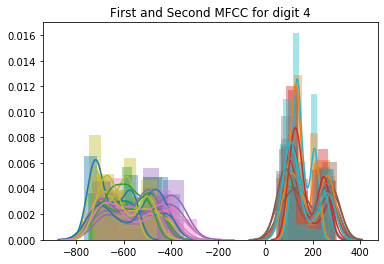

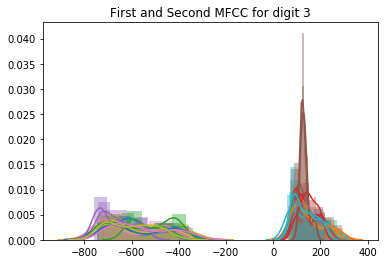

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import inflect

n1 = 4
n2 = 3
s1 = inflect.engine().number_to_words(n1)
s2 = inflect.engine().number_to_words(n2)

for index in range(len(wavs)):
    if digits[index] == s1:
        ax = sns.distplot(mfccs[index][0])
        bx = sns.distplot(mfccs[index][1])
plt.title("First and Second MFCC for digit " + str(n1))
plt.show()

for index in range(len(wavs)):
    if digits[index] == s2:
        ax = sns.distplot(mfccs[index][0])
        bx = sns.distplot(mfccs[index][1])
plt.title("First and Second MFCC for digit " + str(n2))
plt.show()

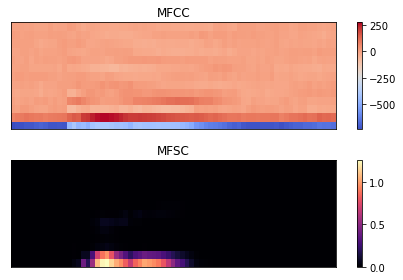

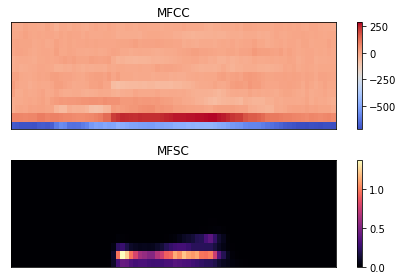

In [5]:
import librosa.display
import random

rand_sp_1 = random.randint(1, len(set(speakers)))
rand_sp_2 = random.randint(1, len(set(speakers)))
while(rand_sp_2 == rand_sp_1):
    rand_sp_2 = random.randint(1, len(set(speakers)))

for index in range(len(wavs)):
    if speakers[index] == rand_sp_1:
        if digits[index] == s1:
            mfcc = librosa.feature.mfcc(y=wavs[index], n_mfcc=13, hop_length=int(0.010*sr), n_fft=int(0.025*sr))
            mfsc = librosa.feature.melspectrogram(y=wavs[index], n_mels=13, hop_length=int(0.010*sr), n_fft=int(0.025*sr))
            plt.subplot(2, 1, 1)
            librosa.display.specshow(mfcc)
            plt.title('MFCC')
            plt.colorbar()
            plt.subplot(2, 1, 2)
            librosa.display.specshow(mfsc)
            plt.title('MFSC')
            plt.colorbar()
            plt.tight_layout()
            plt.show()

    if speakers[index] == rand_sp_2:
        if digits[index] == s2:
            mfcc = librosa.feature.mfcc(y=wavs[index], n_mfcc=13, hop_length=int(0.010*sr), n_fft=int(0.025*sr))
            mfsc = librosa.feature.melspectrogram(y=wavs[index], n_mels=13, hop_length=int(0.010*sr), n_fft=int(0.025*sr))
            plt.subplot(2, 1, 1)
            librosa.display.specshow(mfcc)
            plt.title('MFCC')
            plt.colorbar()
            plt.subplot(2, 1, 2)
            librosa.display.specshow(mfsc)
            plt.title('MFSC')
            plt.colorbar()
            plt.tight_layout()
            plt.show()

>Παρατηρούμε πως δεν έχουμε correlation όταν έχουμε εφαρμόσει τον `DCT`

## Βήμα 5

Ενώνοντας τις λίστες των `mfccs`, `deltas` και `delta-deltas` και βρίσκοντας την μέση τιμή παίρνουμε:

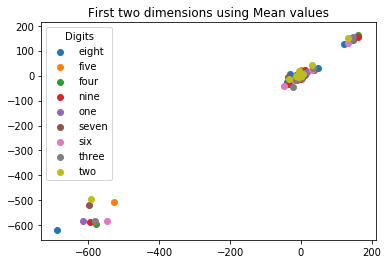

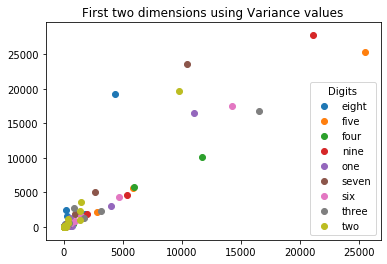

In [129]:
from word2number import w2n

digit_nums = []

for word in set(digits):
    digit_nums.append(w2n.word_to_num(word))

features = []
means = []
variances = []

for i in range(len(wavs)):
    features.append(np.concatenate((np.concatenate((mfccs[i], mfcc_deltas[i])), mfcc_delta_deltas[i])))
    means.append(np.mean(features[i], axis=1))
    variances.append(np.var(features[i], axis=1))

# print(features[0][0][:5])
# print(means[0][:5])
# print(variances[0][:5])
# print(means[0].shape)
# print(variances[0].shape)

fig1, ax = plt.subplots()

group = np.array(digits)
scatter_x = np.array(means)
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix][0], scatter_x[ix][1], label = g)

ax.legend(loc="best", title="Digits")
plt.title("First two dimensions using Mean values")


fig2, bx = plt.subplots()

group = np.array(digits)
scatter_x = np.array(variances)
for g in np.unique(group):
    ix = np.where(group == g)
    bx.scatter(scatter_x[ix][0], scatter_x[ix][1], label = g)

bx.legend(loc="best", title="Digits")
plt.title("First two dimensions using Variance values")

plt.show()

>Παρατηρούμε πως δεν υπάρχει κάποιος ευκρινής διαχωρισμός στα `means`, με την ομαδοποίηση στα `variances` να είναι κάπως καλύτερη

## Βήμα 6
Ενώνοντας τους πίνακες των μέσων τιμών και των διασπορών και για μείωση των διαστάσεων σε 2 έχουμε χρησιμοποιώντας το `Principal Conponent Analysis`:

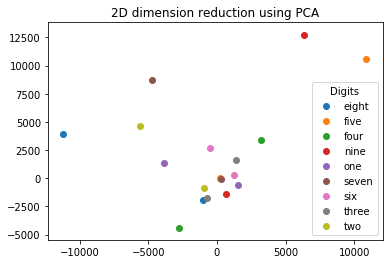

In [102]:
import numpy as np
from sklearn.decomposition import PCA

mean_and_var = []

for i in range(len(wavs)):
    mean_and_var.append(np.concatenate((means[i], variances[i])))

pca2 = PCA(n_components=2)
principalComponents2D = pca2.fit_transform(mean_and_var)


fig1, ax = plt.subplots()

group = np.array(digits)
scatter_x = np.array(principalComponents2D)
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix][0], scatter_x[ix][1], label = g)

ax.legend(loc="best", title="Digits")
plt.title("2D dimension reduction using PCA")

plt.show()

Στην συνέχεια για 3 διαστάσεις έχουμε πάλι με `PCA`:

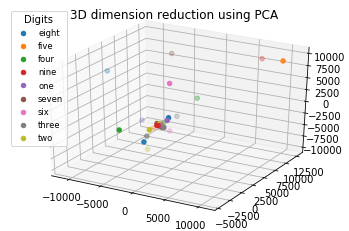

In [109]:
from mpl_toolkits.mplot3d import Axes3D

pca3 = PCA(n_components=3)
principalComponents3D = pca3.fit_transform(mean_and_var)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

group = np.array(digits)
scatter_x = np.array(principalComponents3D)
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix][0], scatter_x[ix][1], scatter_x[ix][2], label = g)

ax.legend(loc="best", title="Digits", fontsize = 'small')
plt.title("3D dimension reduction using PCA")

plt.show()

## Βήμα 7
Χωρίζοντας τα δεδομένα σε `train` και `test` με ποσοστά $70\% - 30\%$ αντίστοιχα, αφού τα κανονικοποιήσουμε έχουμε:

In [128]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

norm_features = normalize(mean_and_var)

X_train, X_test, y_train, y_test = train_test_split(norm_features, digits, test_size=0.30, shuffle=True)

Για τον ταξινομητή Naive Bayes έχουμε από την πρώτη εργαστηριακή άσκηση:

In [111]:
from sklearn.base import BaseEstimator, ClassifierMixin
from collections import defaultdict
import numpy as np

class NaiveBayesClassifier(BaseEstimator, ClassifierMixin):
    """Classify samples based on applying Bayes theorem with
       strong (naïve) independence assumptions between the features"""

    def __init__(self, unitVar = False):
        self.X_mean_ = None
        self.X_var_ = None
        self.n_samples = None
        self.n_features = None
        self.n_classes = None
        self.idx2class = None
        self.class2idx = None
        self.unitVar = unitVar


    def fit(self, X, y):

        """
        This should fit classifier. All the "work" should be done here.

        Calculates self.X_mean_ self.X_mean_var and self.a_priori_ based on the mean and variance
        feature values in X for each class, and on the prior probability feature values of each class.

        self.X_mean_ becomes a numpy.ndarray of shape
        (n_classes, n_features)

        self.X_var_ becomes a numpy.ndarray of shape
        (n_classes, n_features)

        self.a_priori_ becomes a dictionary of shape
        with n_classes number of keys

        fit always returns self.
        """

        n_samples, n_features = X.shape
        n_classes = len(set(y))
        self.idx2class = np.unique(y)

        self.class2idx = defaultdict(lambda: None, {})

        for idx in range(n_classes):
            cl = self.idx2class[idx]
            self.class2idx[cl] = idx

        self.n_samples = n_samples
        self.n_features = n_features
        self.n_classes = n_classes

        cnt = np.zeros(n_classes)
        mean_val = np.zeros((n_classes, n_features))
        var_val = np.zeros((n_classes, n_features))

        for i in range(n_samples):
            idx = self.class2idx[y[i]]
            cnt[idx] = cnt[idx] + 1
            mean_val[idx] = mean_val[idx] + X[i]

        # Mean
        for i in range(n_classes):
            mean_val[i] = mean_val[i] / cnt[i]

        # Variance
        if (self.unitVar):
            var_val = np.ones((n_classes, n_features))
        else:
            for idx in range(n_classes):
                var_val[idx] = np.var(X[y == self.idx2class[idx]], axis = 0)
            var_val += np.finfo(np.float32).eps
            # var_val[var_val == 0] = np.finfo(np.float32).eps

        # Step 14 - a priori probabilities
        labels, counts = np.unique(y, return_counts = True)
        a_priori = defaultdict(lambda : 0, {})
        for label, cnt in zip(labels, counts):
            a_priori[label] = cnt / y.size

        self.X_mean_ = mean_val
        self.X_var_ = var_val
        self.a_priori_ = a_priori

        return self


    def predict(self, X):
        """
        Make predictions for X based on
        Bayes Theroem using Gaussian distributions
        """


        def gaussian_logpdf_vector(xs, ms, vs):

            gaussian_logpdf_1d = lambda x, m, v : -0.5*np.log(2*np.pi * v) - 0.5*(((x - m)**2 )/ v)
            prob = 0
            for x, m, v in zip(xs, ms, vs):
                prob += gaussian_logpdf_1d(x, m, v)
            return prob

        n_test_samples, _ = X.shape
        C = np.zeros(n_test_samples)
        for i in range(n_test_samples):
            maxi = float("-inf")
            prediction = 0
            for idx in range(self.n_classes):
                log_prob1 = gaussian_logpdf_vector(X[i], self.X_mean_[idx], self.X_var_[idx])
                log_prob2 = np.log(self.a_priori_[self.idx2class[idx]])
                log_prob = log_prob1 + log_prob2
                if log_prob >= maxi:
                    prediction = idx
                    maxi = log_prob
            C[i] = self.idx2class[prediction]

        return C


    def score(self, X, y):

        """
        Return accuracy score on the predictions
        for X based on ground truth y
        """

        n_test_samples, _ = X.shape
        accuracy = sum(np.equal(self.predict(X), y)) / n_test_samples

        return accuracy


In [125]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import normalize
import warnings

# myGNB = NaiveBayesClassifier().fit(X_train, y_train)
# print("Naive Bayes Classifier (with our implementation) score is:", myGNB.score(X_test, y_test))

# Gaussian Naive Bayes
gnb = GaussianNB().fit(X_train, y_train)
print("The GaussianNB Classifier score is:", gnb.score(X_test, y_test))
print("The GaussianNB Classifier score using 5-Fold Cross-Validation is:", np.mean(cross_val_score(gnb, norm_features, digits, cv = 5)))

# K Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree').fit(X_train, y_train)
print("The KNN Classifier with k = 3 score is:", knn.score(X_test, y_test))
print("The KNN Classifier with k = 3 score using 5-Fold Cross-Validation is:", np.mean(cross_val_score(knn, norm_features, digits, cv = 5)))

# Support Vector Machine (SVC) with different kernels and gamma='auto'
sup = svm.SVC(kernel='rbf', gamma='auto', probability=True).fit(X_train, y_train)
print("The SVM Classifier score with rbf kernel and gamma='auto' is:", sup.score(X_test, y_test))
print("The SVM Classifier score with rbf kernel and gamma='auto' using 5-Fold Cross-Validation is:",
                                np.mean(cross_val_score(sup, norm_features, digits, cv = 5)))

# Support Vector Machine (SVC) with different kernels and gamma='scale'
sup = svm.SVC(kernel='linear', gamma='scale', probability=True).fit(X_train, y_train)
print("The SVM Classifier score with linear kernel and gamma='scale' is:", sup.score(X_test, y_test))
print("The SVM Classifier score with linear kernel and gamma='scale' using 5-Fold Cross-Validation is:",
                                np.mean(cross_val_score(sup, norm_features, digits, cv = 5)))


The GaussianNB Classifier score is: 0.275
The GaussianNB Classifier score using 5-Fold Cross-Validation is: 0.39111111111111113
The KNN Classifier with k = 3 score is: 0.3
The KNN Classifier with k = 3 score using 5-Fold Cross-Validation is: 0.34785185185185186
The SVM Classifier score with rbf kernel and gamma='auto' is: 0.125
The SVM Classifier score with rbf kernel and gamma='auto' using 5-Fold Cross-Validation is: 0.21214814814814814
The SVM Classifier score with linear kernel and gamma='scale' is: 0.125
The SVM Classifier score with linear kernel and gamma='scale' using 5-Fold Cross-Validation is: 0.21214814814814814


## Βήμα 8